## Random Generator Model Baseline

In [1]:
# Loads in the relevant packages
import pandas as pd
import numpy as np
from evaluate import load

import seaborn as sns
import matplotlib.pyplot as plt

np.random.seed(630)

In [ ]:
# Merges the 2016 and 2017 ROCStories data
df_2016 = pd.read_csv('./ROCStories__spring2016 - ROCStories_spring2016.csv')
df_2017 = pd.read_csv('ROCStories_winter2017 - ROCStories_winter2017.csv')
df = pd.concat([df_2016, df_2017])

In [ ]:
# Creates a database of 5th sentences for the model to randomly select
fifth_sentence_database = df['sentence5']

In [ ]:
# Obtains the predictions and references for each instance in the data
predictions = []
references = []

for index, instance in df.iterrows():
    references.append(instance['sentence5'])
    predictions.append(np.random.choice(fifth_sentence_database))
    break

In [ ]:
# Calculates the BERT score for the random selection model
bertscore = load("bertscore")
results = bertscore.compute(predictions=predictions, references=references, lang="en")

In [ ]:
# The average BERT score results using the random selection model
(np.mean(results['precision']), np.mean(results['recall']), np.mean(results['f1']))

Average BERT score results:

precision: 0.8686750045754013

recall: 0.8686812542627632

f1: 0.868567749891451

In [ ]:
# Calculates the METEOR score for the random selection model
meteor = load('meteor')
results = meteor.compute(predictions=predictions, references=references)

In [ ]:
# The average METEOR score results using the random selection model
(np.mean(results['meteor']))

Average METEOR score results:

meteor: 0.08249881396988645

In [ ]:
# Calculates the BLEU score for the random selection model
bleu = load("bleu")
results = bleu.compute(predictions=predictions, references=references)

In [ ]:
# The average BLEU score results using the random selection model
(np.mean(results['bleu']))

Average BLEU score results:

bleu: 0.0010766664237931724

In [ ]:
# Calculates the ROUGE score for the random selection model
rouge = load('rouge')
results = rouge.compute(predictions=predictions, references=references)

In [ ]:
# The average ROUGE score results using the random selection model
(np.mean(results['rogue1']), np.mean(results['rogue2']), np.mean(results['rougeL']), np.mean(results['rougeLsum']))

Average ROGUE score results:

rogue1: 0.07026043691351706

rogue2: 0.0021983239810122322

rogueL: 0.06483072944486867

rogueLsum: 0.06482816798651193

In [ ]:
# Calculates the Perplexity score for the predictions from the random selection model
perplexity = load("perplexity", module_type="metric")
results = perplexity.compute(predictions=predictions, model_id='gpt2')

In [ ]:
# The average ePerplexity score results using the predictions from the random selection model
results['mean_perplexity']

In [2]:
# Evaluation metrics
bert = {'BERT_precision': 0.8686750045754013, 'BERT_recall': 0.8686812542627632, 'BERT_f1': 0.868567749891451}
meteor = {'METEOR': 0.08249881396988645}
bleu = {'BLEU': 0.0010766664237931724}
rouge = {'ROGUE_rogue1': 0.07026043691351706, 'ROGUE_rogue2': 0.0021983239810122322, 'ROUGE_rogueL': 0.06483072944486867, 'ROUGE_rogueLsum': 0.06482816798651193}
perplexity = {'Perplexity': 140.05386473811177}

/var/folders/3x/y9q1khfd3cs9ml04vvwyl_s40000gn/T/ipykernel_6243/633790398.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax4.set_xticklabels(list(rouge.keys()), rotation=45)


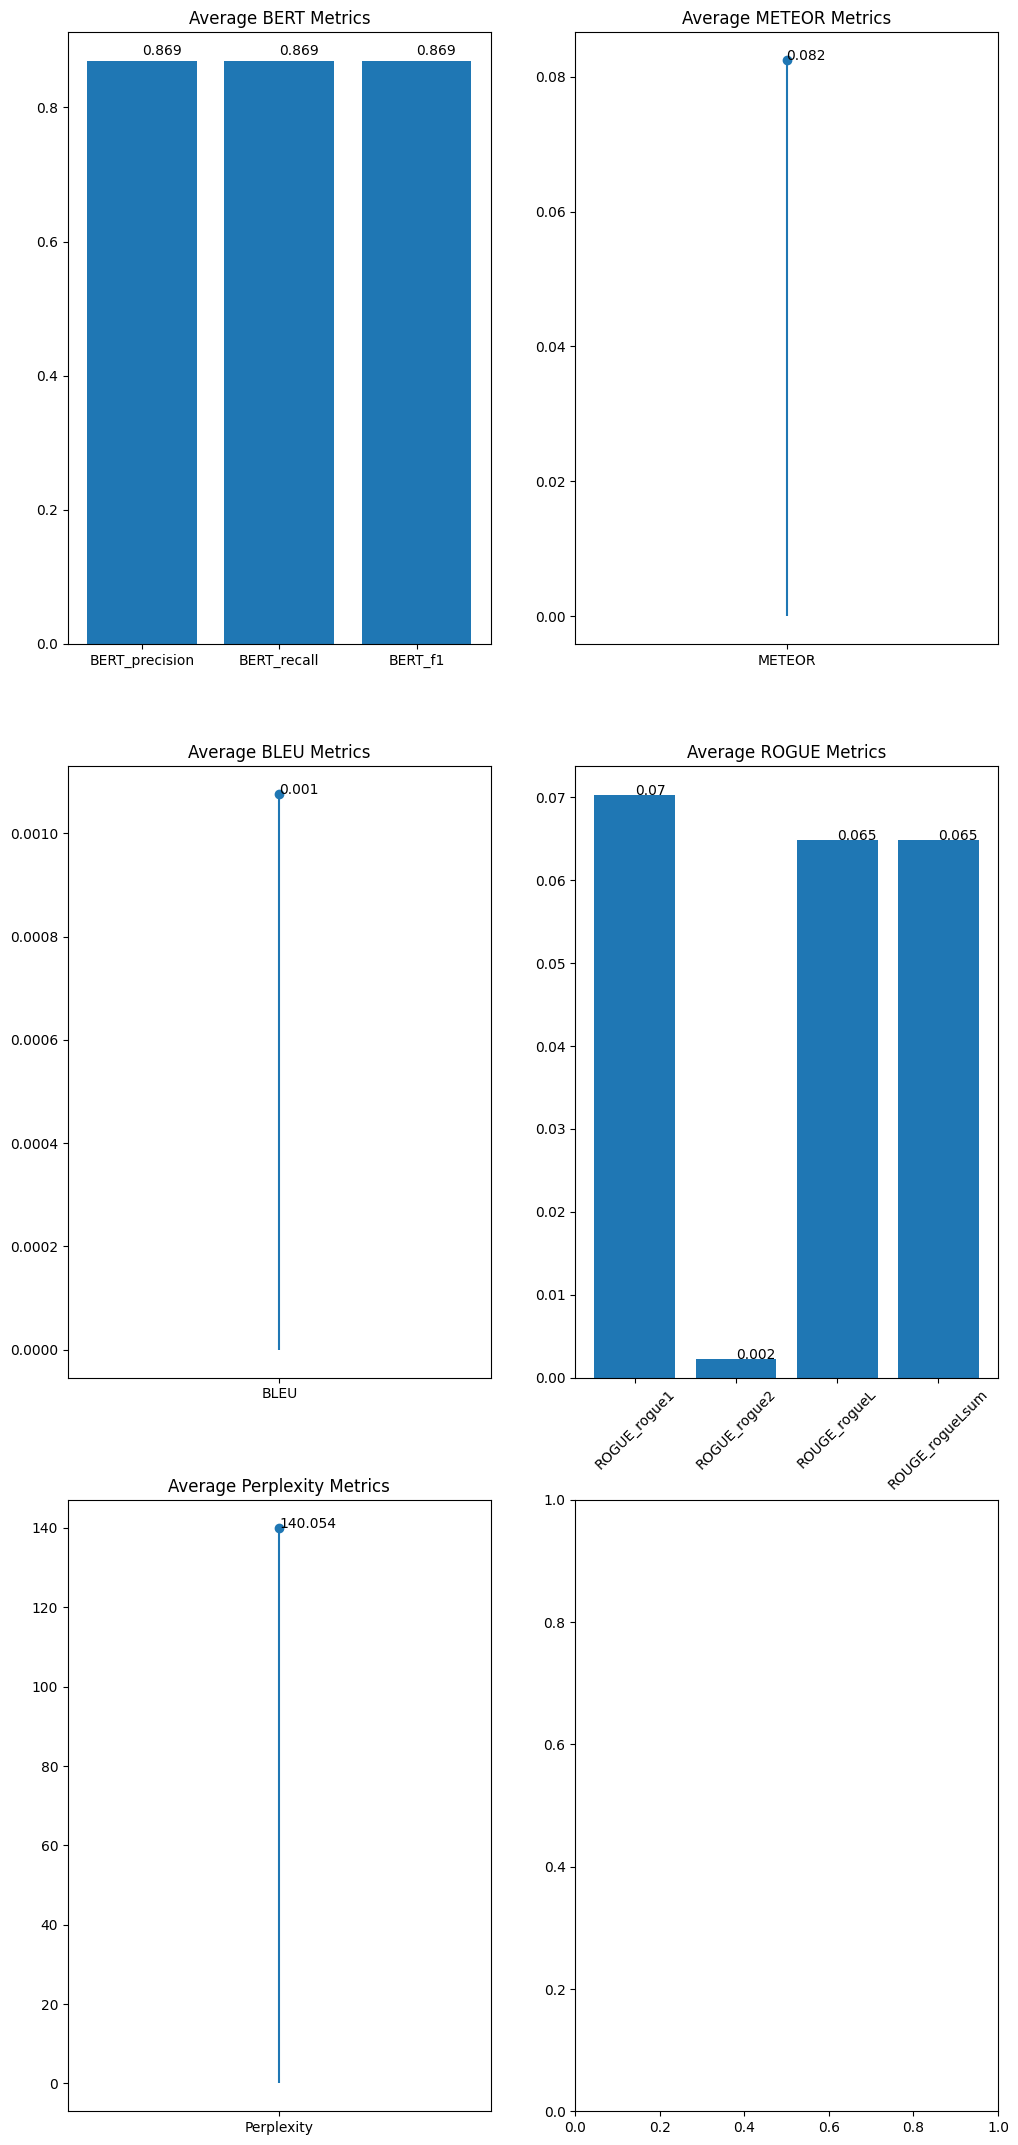

In [33]:
# Plots the 5 metrics
fig, ((ax1, ax2), (ax3, ax4), (ax5, _)) = plt.subplots(3, 2)
fig.set_size_inches(12, 27)

ax1.bar(list(bert.keys()), list(bert.values()))
ax1.set_title('Average BERT Metrics')
for i, j in zip(list(bert.keys()), list(bert.values())):
    ax1.annotate(str(round(j, 3)), xy=(i,j+0.01))

ax2.stem(list(meteor.keys()), list(meteor.values()))
ax2.set_title('Average METEOR Metrics')
for i, j in zip(list(meteor.keys()), list(meteor.values())):
    ax2.annotate(str(round(j, 3)), xy=(i,j))

ax3.stem(list(bleu.keys()), list(bleu.values()))
ax3.set_title('Average BLEU Metrics')
for i, j in zip(list(bleu.keys()), list(bleu.values())):
    ax3.annotate(str(round(j, 3)), xy=(i,j))

ax4.bar(list(rouge.keys()), list(rouge.values()))
ax4.set_title('Average ROGUE Metrics')
ax4.set_xticklabels(list(rouge.keys()), rotation=45)
for i, j in zip(list(rouge.keys()), list(rouge.values())):
    ax4.annotate(str(round(j, 3)), xy=(i,j))

ax5.stem(list(perplexity.keys()), list(perplexity.values()))
ax5.set_title('Average Perplexity Metrics')
for i, j in zip(list(perplexity.keys()), list(perplexity.values())):
    ax5.annotate(str(round(j, 3)), xy=(i,j+0.01))

plt.show()

Average perplexity results:

perplexity: 140.05386473811177